<h1> Regression task - Happiness prediction

In [1]:
import pandas as pd
import numpy as np

# We will only select these two years (2015 and 2016) for the happiness dataset since they are the only ones in which there is data available for both datasets (happiness and suicide) since that is what we want to put together:
happiness_15 = pd.read_csv('./data/Happiness_dataset/2015.csv')
happiness_16 = pd.read_csv('./data/Happiness_dataset/2016.csv')

suicide_dataset = pd.read_csv('./data/Suicide_dataset/master.csv')

happiness_15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<h2> Preprocess happiness_dataset

In [2]:
# Remove whitespaces from column names:
happiness_15.columns.str.strip()
happiness_16.columns.str.strip()

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [3]:
# Get the difference in elements between both arrays (i.e. check if they have the same information):
set(happiness_15.columns) - set(happiness_16.columns)

{'Standard Error'}

In [4]:
# Add year index to further on merge with suicide_dataset:
happiness_15['year'] = 2015
happiness_16['year'] = 2016

happiness_15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


<h3>Group happiness dataset by country and year:

In [5]:
# Set a dict for default aggregation functions and update categorical types with 'first' agg function:
aggf15 = dict.fromkeys(happiness_15, 'mean')
aggf15.update(dict.fromkeys(happiness_15.columns[happiness_15.dtypes.eq(object)], 'first'))
del aggf15['Country'], aggf15['year']

aggf16 = dict.fromkeys(happiness_16, 'mean')
aggf16.update(dict.fromkeys(happiness_16.columns[happiness_16.dtypes.eq(object)], 'first'))
del aggf16['Country'], aggf16['year']

aggf15

{'Region': 'first',
 'Happiness Rank': 'mean',
 'Happiness Score': 'mean',
 'Standard Error': 'mean',
 'Economy (GDP per Capita)': 'mean',
 'Family': 'mean',
 'Health (Life Expectancy)': 'mean',
 'Freedom': 'mean',
 'Trust (Government Corruption)': 'mean',
 'Generosity': 'mean',
 'Dystopia Residual': 'mean'}

In [6]:
happiness_gby_15 = happiness_15.groupby(by=['Country', 'year'], sort=False).agg(aggf15)
happiness_gby_16 = happiness_16.groupby(by=['Country', 'year'], sort=False).agg(aggf16)

happiness_gby_15.head()

,,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,year,,,,,,,,,,,
Switzerland,2015,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,2015,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,2015,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,2015,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,2015,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
happiness_gby_15.shape, happiness_gby_16.shape

((158, 11), (157, 12))

In [8]:
# See which country is missing from the smaller (less rows) dataset:
set(happiness_gby_15.index.get_level_values(level=0)) - set(happiness_gby_16.index.get_level_values(level=0))

{'Central African Republic',
 'Djibouti',
 'Lesotho',
 'Mozambique',
 'Oman',
 'Somaliland region',
 'Swaziland'}

In [9]:
# TODO -----------------------------------------------------
# Put together both happiness_15 and happiness_16 datasets:
happiness_gby_15.index.names =  ['country', 'year'] # Convert to lowercase for merging
happiness_gby_16.index.names = ['country', 'year']
# Concatenate both datasets:
happiness_gby_1516 = pd.concat([happiness_gby_15, happiness_gby_16]).reset_index()

# Set a dict for default aggregation functions and update categorical types with 'first' agg function:
aggf1516 = dict.fromkeys(happiness_gby_1516, 'mean')
aggf1516.update(dict.fromkeys(happiness_gby_1516.columns[happiness_gby_1516.dtypes.eq(object)], 'first'))
del aggf1516['country'], aggf1516['year']

# Groupby on the basis of country and year
happiness_gby_1516 = happiness_gby_1516.groupby(by=['country', 'year']).agg(aggf1516)

print(happiness_gby_1516.shape)
happiness_gby_1516.head()

(315, 13)


Region  Happiness Rank  \
country     year                                                    
Afghanistan 2015                    Southern Asia             153   
            2016                    Southern Asia             154   
Albania     2015       Central and Eastern Europe              95   
            2016       Central and Eastern Europe             109   
Algeria     2015  Middle East and Northern Africa              68   

                  Happiness Score  Standard Error  Economy (GDP per Capita)  \
country     year                                                              
Afghanistan 2015            3.575         0.03084                   0.31982   
            2016            3.360             NaN                   0.38227   
Albania     2015            4.959         0.05013                   0.87867   
            2016            4.655             NaN                   0.95530   
Algeria     2015            5.605         0.05099                   0.93929   

                   Family  Health (Life Expectancy)  Freedom  \
country     year                                               
Afghanistan 2015  0.30285                   0.30335  0.23414   
            2016  0.11037                   0.17344  0.16430   
Albania     2015  0.80434                   0.81325  0.35733   
            2016  0.50163                   0.73007  0.31866   
Algeria     2015  1.07772                   0.61766  0.28579   

                  Trust (Government Corruption)  Generosity  \
country     year                                              
Afghanistan 2015                        0.09719     0.36510   
            2016                        0.07112     0.31268   
Albania     2015                        0.06413     0.14272   
            2016                        0.05301     0.16840   
Algeria     2015                        0.17383     0.07822   

                  Dystopia Residual  Lower Confidence Interval  \
country     year                                                 
Afghanistan 2015            1.95210                        NaN   
            2016            2.14558                      3.288   
Albania     2015            1.89894                        NaN   
            2016            1.92816                      4.546   
Algeria     2015            2.43209                        NaN   

                  Upper Confidence Interval  
country     year                             
Afghanistan 2015                        NaN  
            2016                      3.432  
Albania     2015                        NaN  
            2016                      4.764  
Algeria     2015                        NaN

In [10]:
# Number of unique values in index:
happiness_gby_1516.index.unique(level=1)

Int64Index([2015, 2016], dtype='int64', name='year')

<h3> Keep only the countries that have data for the two years (OPTIONAL) - happiness dataset

In [11]:
happiness_final_list = []

for i, element in enumerate(happiness_gby_1516.index.get_level_values(0)):  # iterate over 'country' index elements
    if len(happiness_gby_1516.loc[element].index.get_level_values(0)) == 2:  
        happiness_final_list.append(happiness_gby_1516.iloc[[i]])

happiness_final = pd.concat(happiness_final_list)

print(happiness_final.shape)
happiness_final.head()

(302, 13)


Region  Happiness Rank  \
country     year                                                    
Afghanistan 2015                    Southern Asia             153   
            2016                    Southern Asia             154   
Albania     2015       Central and Eastern Europe              95   
            2016       Central and Eastern Europe             109   
Algeria     2015  Middle East and Northern Africa              68   

                  Happiness Score  Standard Error  Economy (GDP per Capita)  \
country     year                                                              
Afghanistan 2015            3.575         0.03084                   0.31982   
            2016            3.360             NaN                   0.38227   
Albania     2015            4.959         0.05013                   0.87867   
            2016            4.655             NaN                   0.95530   
Algeria     2015            5.605         0.05099                   0.93929   

                   Family  Health (Life Expectancy)  Freedom  \
country     year                                               
Afghanistan 2015  0.30285                   0.30335  0.23414   
            2016  0.11037                   0.17344  0.16430   
Albania     2015  0.80434                   0.81325  0.35733   
            2016  0.50163                   0.73007  0.31866   
Algeria     2015  1.07772                   0.61766  0.28579   

                  Trust (Government Corruption)  Generosity  \
country     year                                              
Afghanistan 2015                        0.09719     0.36510   
            2016                        0.07112     0.31268   
Albania     2015                        0.06413     0.14272   
            2016                        0.05301     0.16840   
Algeria     2015                        0.17383     0.07822   

                  Dystopia Residual  Lower Confidence Interval  \
country     year                                                 
Afghanistan 2015            1.95210                        NaN   
            2016            2.14558                      3.288   
Albania     2015            1.89894                        NaN   
            2016            1.92816                      4.546   
Algeria     2015            2.43209                        NaN   

                  Upper Confidence Interval  
country     year                             
Afghanistan 2015                        NaN  
            2016                      3.432  
Albania     2015                        NaN  
            2016                      4.764  
Algeria     2015                        NaN

<h2> Preprocess suicide_dataset

<h3> Select only the years where there is data for both datasets (2015 and 2016)

In [12]:
# Remove whitespaces from column names:
suicide_dataset.columns.str.strip()

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [13]:
suicide_dataset_1516 = suicide_dataset[(suicide_dataset['year'] == 2015) | (suicide_dataset['year'] == 2016)]

suicide_dataset_1516.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
576,Antigua and Barbuda,2015,female,55-74 years,1,6403,15.62,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Boomers
577,Antigua and Barbuda,2015,female,15-24 years,0,8561,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
578,Antigua and Barbuda,2015,female,25-34 years,0,7740,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Millenials
579,Antigua and Barbuda,2015,female,35-54 years,0,15323,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation X
580,Antigua and Barbuda,2015,female,5-14 years,0,8239,0.00,Antigua and Barbuda2015,NaN,"1,364,863,037",14853,Generation Z


<h3>Group suicide_dataset by country:

In [14]:
suicide_dataset_gby1516 = suicide_dataset_1516.groupby(['country', 'year']).agg({'suicides_no':['sum'], 'population':'sum', 'suicides/100k pop': 'sum', 'HDI for year': 'mean', 'gdp_per_capita ($)': 'mean'})

# Make big numbers in population more readable with commas for the thousands:
# suicide_dataset_gby1516['population'] = suicide_dataset_gby1516['population'].applymap(lambda x: f'{x:,}')

print(suicide_dataset_gby1516.shape)
suicide_dataset_gby1516.head()

(78, 5)


suicides_no population suicides/100k pop  \
                                 sum        sum               sum   
country             year                                            
Antigua and Barbuda 2015           1      91889             15.62   
Argentina           2015        3073   39699624            112.13   
Armenia             2015          74    2795335             45.28   
                    2016          67    2400033             40.56   
Australia           2015        3027   22240785            154.18   

                         HDI for year gdp_per_capita ($)  
                                 mean               mean  
country             year                                  
Antigua and Barbuda 2015          NaN              14853  
Argentina           2015          NaN              14981  
Armenia             2015          NaN               3775  
                    2016          NaN               3788  
Australia           2015          NaN              60656

In [15]:
# Get the difference in elements between both arrays(columns missing from the pivoting aggregation), taking into account the pivoted column:
set(suicide_dataset.columns) - (set(suicide_dataset_gby1516.columns) | set([suicide_dataset_gby1516.index.name]))

{' gdp_for_year ($) ',
 'HDI for year',
 'age',
 'country',
 'country-year',
 'gdp_per_capita ($)',
 'generation',
 'population',
 'sex',
 'suicides/100k pop',
 'suicides_no',
 'year'}

<h3> Keep only the countries that have data for the two years (OPTIONAL) - suicide dataset

In [16]:
suicide_list = []

for i, element in enumerate(suicide_dataset_gby1516.index.get_level_values(0)):
    if len(suicide_dataset_gby1516.loc[element].index.get_level_values(0)) == 2:
        suicide_list.append(suicide_dataset_gby1516.iloc[[i]])

suicide_final = pd.concat(suicide_list)

print(suicide_final.shape)
suicide_final.head()

(30, 5)


suicides_no population suicides/100k pop HDI for year  \
                     sum        sum               sum         mean   
country year                                                         
Armenia 2015          74    2795335             45.28          NaN   
        2016          67    2400033             40.56          NaN   
Austria 2015        1251    8219386            194.62          NaN   
        2016        1201    7484629            183.23          NaN   
Croatia 2015         739    4001669            229.68          NaN   

             gdp_per_capita ($)  
                           mean  
country year                     
Armenia 2015               3775  
        2016               3788  
Austria 2015              46484  
        2016              46976  
Croatia 2015              12351

<h2> Put together both datasets

In [17]:
# First drop the aggregation function level in column index (for both the years-filtered suicide dataset and non filtered versions):
suicide_dataset_gby1516.columns = suicide_dataset_gby1516.columns.droplevel(1)
suicide_final.columns = suicide_final.columns.droplevel(1)

suicide_final.head()

suicides_no  population  suicides/100k pop  HDI for year  \
country year                                                             
Armenia 2015           74     2795335              45.28           NaN   
        2016           67     2400033              40.56           NaN   
Austria 2015         1251     8219386             194.62           NaN   
        2016         1201     7484629             183.23           NaN   
Croatia 2015          739     4001669             229.68           NaN   

              gdp_per_capita ($)  
country year                      
Armenia 2015                3775  
        2016                3788  
Austria 2015               46484  
        2016               46976  
Croatia 2015               12351

In [18]:
# Now put them together.
happiness_final.shape, suicide_dataset_gby1516.shape

((302, 13), (78, 5))

In [19]:
# Now merge them with suicide_dataset that has already been filtered for those years:
merged = happiness_final.merge(suicide_dataset_gby1516, left_index=True, left_on=['country', 'year'], right_on='country', right_index=True)
merged_innermerge = pd.merge(suicide_dataset_gby1516, happiness_final, on=['country', 'year'], how='inner') # TODO TESTING

print(happiness_final.index.nlevels, suicide_dataset_gby1516.index.nlevels)
print(merged.shape)

merged.head()

2 2
(68, 18)


Region  Happiness Rank  Happiness Score  \
country   year                                                                 
Argentina 2015  Latin America and Caribbean              30            6.574   
Armenia   2015   Central and Eastern Europe             127            4.350   
          2016   Central and Eastern Europe             121            4.360   
Australia 2015    Australia and New Zealand              10            7.284   
Austria   2015               Western Europe              13            7.200   

                Standard Error  Economy (GDP per Capita)   Family  \
country   year                                                      
Argentina 2015         0.04612                   1.05351  1.24823   
Armenia   2015         0.04763                   0.76821  0.77711   
          2016             NaN                   0.86086  0.62477   
Australia 2015         0.04083                   1.33358  1.30923   
Austria   2015         0.03751                   1.33723  1.29704   

                Health (Life Expectancy)  Freedom  \
country   year                                      
Argentina 2015                   0.78723  0.44974   
Armenia   2015                   0.72990  0.19847   
          2016                   0.64083  0.14037   
Australia 2015                   0.93156  0.65124   
Austria   2015                   0.89042  0.62433   

                Trust (Government Corruption)  Generosity  Dystopia Residual  \
country   year                                                                 
Argentina 2015                        0.08484     0.11451            2.83600   
Armenia   2015                        0.03900     0.07855            1.75873   
          2016                        0.03616     0.07793            1.97864   
Australia 2015                        0.35637     0.43562            2.26646   
Austria   2015                        0.18676     0.33088            2.53320   

                Lower Confidence Interval  Upper Confidence Interval  \
country   year                                                         
Argentina 2015                        NaN                        NaN   
Armenia   2015                        NaN                        NaN   
          2016                      4.266                      4.454   
Australia 2015                        NaN                        NaN   
Austria   2015                        NaN                        NaN   

                suicides_no  population  suicides/100k pop  HDI for year  \
country   year                                                             
Argentina 2015         3073    39699624             112.13           NaN   
Armenia   2015           74     2795335              45.28           NaN   
          2016           67     2400033              40.56           NaN   
Australia 2015         3027    22240785             154.18           NaN   
Austria   2015         1251     8219386             194.62           NaN   

                gdp_per_capita ($)  
country   year                      
Argentina 2015               14981  
Armenia   2015                3775  
          2016                3788  
Australia 2015               60656  
Austria   2015               46484

In [20]:
# Change order of columns for better visualization (focus on happiness and suicide numbers for now):
new_col_order = ['Happiness Rank', 'Happiness Score', 'suicides_no', 'suicides/100k pop', 'population', 'gdp_per_capita ($)', 'Economy (GDP per Capita)', 'Freedom', 'Health (Life Expectancy)', 'Generosity', 'Family', 'Trust (Government Corruption)', 'HDI for year', 'Dystopia Residual', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Standard Error','Region']
merged = merged[new_col_order].sort_values(by='suicides/100k pop', ascending=False)
# TODO there are two columns for GDP per capita.
merged.head(3)

Happiness Rank  Happiness Score  suicides_no  \
country   year                                                 
Lithuania 2015              56            5.833          896   
          2016              60            5.813          822   
Uruguay   2015              32            6.485          630   

                suicides/100k pop  population  gdp_per_capita ($)  \
country   year                                                      
Lithuania 2015             385.48     2753926               15073   
          2016             361.72     2445296               15742   
Uruguay   2015             270.02     3190795               16696   

                Economy (GDP per Capita)  Freedom  Health (Life Expectancy)  \
country   year                                                                
Lithuania 2015                   1.14723  0.21342                   0.73128   
          2016                   1.26920  0.18929                   0.64674   
Uruguay   2015                   1.06166  0.60362                   0.81160   

                Generosity   Family  Trust (Government Corruption)  \
country   year                                                       
Lithuania 2015     0.02641  1.25745                        0.01031   
          2016     0.02025  1.06411                        0.01820   
Uruguay   2015     0.23240  1.20890                        0.24558   

                HDI for year  Dystopia Residual  Lower Confidence Interval  \
country   year                                                               
Lithuania 2015           NaN            2.44649                        NaN   
          2016           NaN            2.60525                      5.734   
Uruguay   2015           NaN            2.32142                        NaN   

                Upper Confidence Interval  Standard Error  \
country   year                                              
Lithuania 2015                        NaN         0.03843   
          2016                      5.892             NaN   
Uruguay   2015                        NaN         0.04539   

                                     Region  
country   year                               
Lithuania 2015   Central and Eastern Europe  
          2016   Central and Eastern Europe  
Uruguay   2015  Latin America and Caribbean

<h2> Preprocess the final (merged) dataset

<h3> Handle missing values

In [21]:
# Count missing values:
missing = merged.isnull().sum()

total_vs_missing = pd.DataFrame(index=['Missing values'], columns=merged.columns.tolist())
total_vs_missing.loc['Missing values'] = missing.values

print("\nFrom a total of:", merged.shape[0])

total_vs_missing


From a total of: 68


,Happiness Rank,Happiness Score,suicides_no,suicides/100k pop,population,gdp_per_capita ($),Economy (GDP per Capita),Freedom,Health (Life Expectancy),Generosity,Family,Trust (Government Corruption),HDI for year,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Standard Error,Region
Missing values,0,0,0,0,0,0,0,0,0,0,0,0,68,0,53,53,15,0


In [22]:
# Get rid of columns with too much missing data (over 50% of missing data):

# 1) get mask of all such columns
mask = (total_vs_missing.loc['Missing values'] >= (merged.shape[0]/2)).tolist()

# 2) pass mask to original dataframe
print("Previous Shape:", merged.shape)
merged.drop(columns=total_vs_missing.loc[:, mask].columns, axis=1, inplace=True)
print("After Shape:", merged.shape)
merged.head()

Previous Shape: (68, 18)
After Shape: (68, 15)


Happiness Rank  Happiness Score  suicides_no  \
country   year                                                 
Lithuania 2015              56            5.833          896   
          2016              60            5.813          822   
Uruguay   2015              32            6.485          630   
Slovenia  2015              55            5.848          422   
Hungary   2015             104            4.800         1868   

                suicides/100k pop  population  gdp_per_capita ($)  \
country   year                                                      
Lithuania 2015             385.48     2753926               15073   
          2016             361.72     2445296               15742   
Uruguay   2015             270.02     3190795               16696   
Slovenia  2015             264.81     1954632               22036   
Hungary   2015             257.27     9389519               13087   

                Economy (GDP per Capita)  Freedom  Health (Life Expectancy)  \
country   year                                                                
Lithuania 2015                   1.14723  0.21342                   0.73128   
          2016                   1.26920  0.18929                   0.64674   
Uruguay   2015                   1.06166  0.60362                   0.81160   
Slovenia  2015                   1.18498  0.60855                   0.87337   
Hungary   2015                   1.12094  0.32112                   0.75905   

                Generosity   Family  Trust (Government Corruption)  \
country   year                                                       
Lithuania 2015     0.02641  1.25745                        0.01031   
          2016     0.02025  1.06411                        0.01820   
Uruguay   2015     0.23240  1.20890                        0.24558   
Slovenia  2015     0.25328  1.27385                        0.03787   
Hungary   2015     0.12800  1.20215                        0.02758   

                Dystopia Residual  Standard Error                       Region  
country   year                                                                  
Lithuania 2015            2.44649         0.03843   Central and Eastern Europe  
          2016            2.60525             NaN   Central and Eastern Europe  
Uruguay   2015            2.32142         0.04539  Latin America and Caribbean  
Slovenia  2015            1.61583         0.04251   Central and Eastern Europe  
Hungary   2015            1.24074         0.06107   Central and Eastern Europe

In [23]:
# Fill-in missing values (where possible).

# For Standard Error, all the missing values are for the 2016 data. We can take the values from the above ('backfill), 2015 row of data, once sorted on year, since it has available data: 
merged.sort_values(by=['suicides/100k pop', 'country', 'year'], ascending=False, inplace=True)
merged['Standard Error'].fillna(method='ffill', inplace=True)
merged.head()

Happiness Rank  Happiness Score  suicides_no  \
country   year                                                 
Lithuania 2015              56            5.833          896   
          2016              60            5.813          822   
Uruguay   2015              32            6.485          630   
Slovenia  2015              55            5.848          422   
Hungary   2015             104            4.800         1868   

                suicides/100k pop  population  gdp_per_capita ($)  \
country   year                                                      
Lithuania 2015             385.48     2753926               15073   
          2016             361.72     2445296               15742   
Uruguay   2015             270.02     3190795               16696   
Slovenia  2015             264.81     1954632               22036   
Hungary   2015             257.27     9389519               13087   

                Economy (GDP per Capita)  Freedom  Health (Life Expectancy)  \
country   year                                                                
Lithuania 2015                   1.14723  0.21342                   0.73128   
          2016                   1.26920  0.18929                   0.64674   
Uruguay   2015                   1.06166  0.60362                   0.81160   
Slovenia  2015                   1.18498  0.60855                   0.87337   
Hungary   2015                   1.12094  0.32112                   0.75905   

                Generosity   Family  Trust (Government Corruption)  \
country   year                                                       
Lithuania 2015     0.02641  1.25745                        0.01031   
          2016     0.02025  1.06411                        0.01820   
Uruguay   2015     0.23240  1.20890                        0.24558   
Slovenia  2015     0.25328  1.27385                        0.03787   
Hungary   2015     0.12800  1.20215                        0.02758   

                Dystopia Residual  Standard Error                       Region  
country   year                                                                  
Lithuania 2015            2.44649         0.03843   Central and Eastern Europe  
          2016            2.60525         0.03843   Central and Eastern Europe  
Uruguay   2015            2.32142         0.04539  Latin America and Caribbean  
Slovenia  2015            1.61583         0.04251   Central and Eastern Europe  
Hungary   2015            1.24074         0.06107   Central and Eastern Europe

In [24]:
merged.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
suicides_no                      0
suicides/100k pop                0
population                       0
gdp_per_capita ($)               0
Economy (GDP per Capita)         0
Freedom                          0
Health (Life Expectancy)         0
Generosity                       0
Family                           0
Trust (Government Corruption)    0
Dystopia Residual                0
Standard Error                   0
Region                           0
dtype: int64

<h3> Looking for outliers

In [25]:
# Compute mean and stdev for every column:
col_means = merged.mean()
col_stdev = merged.std()

three_stdev = col_stdev * 3
three_stdev_upper = col_means + three_stdev
three_stdev_lower = col_means - three_stdev

# Put them together for better visualization:
outlier_bounds = pd.DataFrame(data=[three_stdev_upper, col_means, three_stdev_lower, col_stdev] , index=[' 3 times Stdev above mean', 'Mean', '3 times Stdev below mean', 'Stdev'], columns=three_stdev_lower.index.values)

outlier_bounds.style.set_caption('Outlier upper and lower bounds (stdev) from mean')

outlier_bounds

,Happiness Rank,Happiness Score,suicides_no,suicides/100k pop,population,gdp_per_capita ($),Economy (GDP per Capita),Freedom,Health (Life Expectancy),Generosity,Family,Trust (Government Corruption),Dystopia Residual,Standard Error
3 times Stdev above mean,152.744304,8.965144,21095.152446,375.582754,1.675229e+08,101775.823005,1.891139,0.921524,1.163739,0.676427,1.732474,0.610898,3.695242,0.075912
Mean,47.426471,6.186735,2625.397059,135.809118,2.508813e+07,27878.882353,1.165026,0.462523,0.789388,0.248857,1.105152,0.162084,2.253716,0.043845
3 times Stdev below mean,-57.891363,3.408326,-15844.358328,-103.964519,-1.173466e+08,-46018.058299,0.438913,0.003521,0.415037,-0.178713,0.477831,-0.286730,0.812190,0.011778
Stdev,35.105945,0.926136,6156.585129,79.924546,4.747825e+07,24632.313551,0.242038,0.153001,0.124784,0.142523,0.209107,0.149605,0.480509,0.010689


In [26]:
# create a mask for the column outliers (for non categorical variables):
outlier_mask = (merged.drop('Region', axis=1) >= three_stdev_upper.values) | (merged.drop('Region', axis=1) <= three_stdev_lower.values)  # without the categorical variable 'Region'
outlier_mask.head()

Happiness Rank  Happiness Score  suicides_no  \
country   year                                                 
Lithuania 2015           False            False        False   
          2016           False            False        False   
Uruguay   2015           False            False        False   
Slovenia  2015           False            False        False   
Hungary   2015           False            False        False   

                suicides/100k pop  population  gdp_per_capita ($)  \
country   year                                                      
Lithuania 2015               True       False               False   
          2016              False       False               False   
Uruguay   2015              False       False               False   
Slovenia  2015              False       False               False   
Hungary   2015              False       False               False   

                Economy (GDP per Capita)  Freedom  Health (Life Expectancy)  \
country   year                                                                
Lithuania 2015                     False    False                     False   
          2016                     False    False                     False   
Uruguay   2015                     False    False                     False   
Slovenia  2015                     False    False                     False   
Hungary   2015                     False    False                     False   

                Generosity  Family  Trust (Government Corruption)  \
country   year                                                      
Lithuania 2015       False   False                          False   
          2016       False   False                          False   
Uruguay   2015       False   False                          False   
Slovenia  2015       False   False                          False   
Hungary   2015       False   False                          False   

                Dystopia Residual  Standard Error  
country   year                                     
Lithuania 2015              False           False  
          2016              False           False  
Uruguay   2015              False           False  
Slovenia  2015              False           False  
Hungary   2015              False           False

In [27]:
# Initialize list to append outlier elements:
outlier_list = []

for column, [_, row] in zip(outlier_mask, outlier_mask.iterrows()):

    # print(column, outlier_mask[column].head())

    # apply the masks to the dataframe and append the true rows (outlier rows) to the outlier_list:
    outlier_list.append(merged.loc[outlier_mask[column], column].rename(column))

    # or append the value with the row and column name:
    # outlier_list.append(merged.loc[outlier_mask[column], column])


# create a dataframe from all the rows with outliers:
outlier_df = pd.concat(outlier_list, axis=1)

print(outlier_df.shape)

outlier_df

(7, 14)


,,Happiness Rank,Happiness Score,suicides_no,suicides/100k pop,population,gdp_per_capita ($),Economy (GDP per Capita),Freedom,Health (Life Expectancy),Generosity,Family,Trust (Government Corruption),Dystopia Residual,Standard Error
country,year,,,,,,,,,,,,,,
Brazil,2015,NaN,NaN,NaN,NaN,191087085.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Georgia,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.38562,NaN,NaN,NaN
Japan,2015,NaN,NaN,23092.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lithuania,2015,NaN,NaN,NaN,385.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Luxembourg,2015,NaN,NaN,NaN,NaN,NaN,107456.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South Africa,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.27688,NaN,NaN,NaN,NaN,NaN
United States,2015,NaN,NaN,44189.0,NaN,300078511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# highlight the outliers:

def color_outlier(val):

    if pd.notna(val):
        style = 'color: red'
    else:
        style = 'color: black'
    
    return style


outlier_styled = outlier_df.style.applymap(color_outlier)

outlier_styled

,,Happiness Rank,Happiness Score,suicides_no,suicides/100k pop,population,gdp_per_capita ($),Economy (GDP per Capita),Freedom,Health (Life Expectancy),Generosity,Family,Trust (Government Corruption),Dystopia Residual,Standard Error
country,year,,,,,,,,,,,,,,
Brazil,2015,nan,nan,nan,nan,191087085.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
Georgia,2015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.385620,nan,nan,nan
Japan,2015,nan,nan,23092.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Lithuania,2015,nan,nan,nan,385.480000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Luxembourg,2015,nan,nan,nan,nan,nan,107456.000000,nan,nan,nan,nan,nan,nan,nan,nan
South Africa,2015,nan,nan,nan,nan,nan,nan,nan,nan,0.276880,nan,nan,nan,nan,nan
United States,2015,nan,nan,44189.000000,nan,300078511.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [29]:
# Add outlier_bounds to dataframe to better visualize the nature of the outliers:
outlier_and_boundaries_df = pd.concat([outlier_df.reset_index().drop(['country','year'], axis=1), outlier_bounds], axis=0)

# Styling:
outlier_and_boundaries_styled = outlier_and_boundaries_df.style.applymap(color_outlier, subset=pd.IndexSlice[[0,1,2,3,4,5,6], :])

outlier_and_boundaries_styled

,Happiness Rank,Happiness Score,suicides_no,suicides/100k pop,population,gdp_per_capita ($),Economy (GDP per Capita),Freedom,Health (Life Expectancy),Generosity,Family,Trust (Government Corruption),Dystopia Residual,Standard Error
0,nan,nan,nan,nan,191087085.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.385620,nan,nan,nan
2,nan,nan,23092.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,nan,nan,nan,385.480000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,nan,nan,nan,nan,nan,107456.000000,nan,nan,nan,nan,nan,nan,nan,nan
5,nan,nan,nan,nan,nan,nan,nan,nan,0.276880,nan,nan,nan,nan,nan
6,nan,nan,44189.000000,nan,300078511.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
3 times Stdev above mean,152.744304,8.965144,21095.152446,375.582754,167522877.339457,101775.823005,1.891139,0.921524,1.163739,0.676427,1.732474,0.610898,3.695242,0.075912
Mean,47.426471,6.186735,2625.397059,135.809118,25088132.632353,27878.882353,1.165026,0.462523,0.789388,0.248857,1.105152,0.162084,2.253716,0.043845
3 times Stdev below mean,-57.891363,3.408326,-15844.358328,-103.964519,-117346612.074751,-46018.058299,0.438913,0.003521,0.415037,-0.178713,0.477831,-0.286730,0.812190,0.011778


We will keep the outliers as they are not many, and they seem meaningful and not errors.


<h2> Feature Engineering

<h3> Get rid of highly correlated features

In [31]:
correlation_df = merged.corr(method='pearson')
# correlation_df.style.applymap(lambda x: 'background-color: yellow' if  x > 0.8 and x != 1 else ('background-color: orange' if x < -0.8 else 'background-color: white'))

,Happiness Rank,Happiness Score,suicides_no,suicides/100k pop,population,gdp_per_capita ($),Economy (GDP per Capita),Freedom,Health (Life Expectancy),Generosity,Family,Trust (Government Corruption),Dystopia Residual,Standard Error
Happiness Rank,1.000000,-0.991318,-0.150799,0.012421,-0.174150,-0.672279,-0.589793,-0.772215,-0.593070,-0.562331,-0.591367,-0.523876,-0.626550,0.305071
Happiness Score,-0.991318,1.000000,0.143172,-0.017791,0.165928,0.705004,0.598693,0.768588,0.593686,0.573646,0.581563,0.560106,0.629425,-0.315741
suicides_no,-0.150799,0.143172,1.000000,0.107550,0.903497,0.106519,0.088280,0.088760,0.154740,0.056369,0.194791,-0.028592,0.070552,-0.211799
suicides/100k pop,0.012421,-0.017791,0.107550,1.000000,-0.081901,-0.008470,0.108139,-0.138134,0.073500,-0.250856,0.214459,-0.202521,-0.019835,-0.204454
population,-0.174150,0.165928,0.903497,-0.081901,1.000000,0.005719,-0.010441,0.062303,0.043076,0.039743,0.181991,-0.041657,0.216119,-0.231798
gdp_per_capita ($),-0.672279,0.705004,0.106519,-0.008470,0.005719,1.000000,0.823870,0.583716,0.638626,0.450479,0.384422,0.731855,0.063469,-0.238954
Economy (GDP per Capita),-0.589793,0.598693,0.088280,0.108139,-0.010441,0.823870,1.000000,0.386825,0.527722,0.335835,0.226752,0.528117,0.027323,-0.101269
Freedom,-0.772215,0.768588,0.088760,-0.138134,0.062303,0.583716,0.386825,1.000000,0.406083,0.641057,0.563847,0.648490,0.225334,-0.183732
Health (Life Expectancy),-0.593070,0.593686,0.154740,0.073500,0.043076,0.638626,0.527722,0.406083,1.000000,0.294988,0.335542,0.372257,0.140095,-0.262145
Generosity,-0.562331,0.573646,0.056369,-0.250856,0.039743,0.450479,0.335835,0.641057,0.294988,1.000000,0.338315,0.345667,0.104340,-0.027787


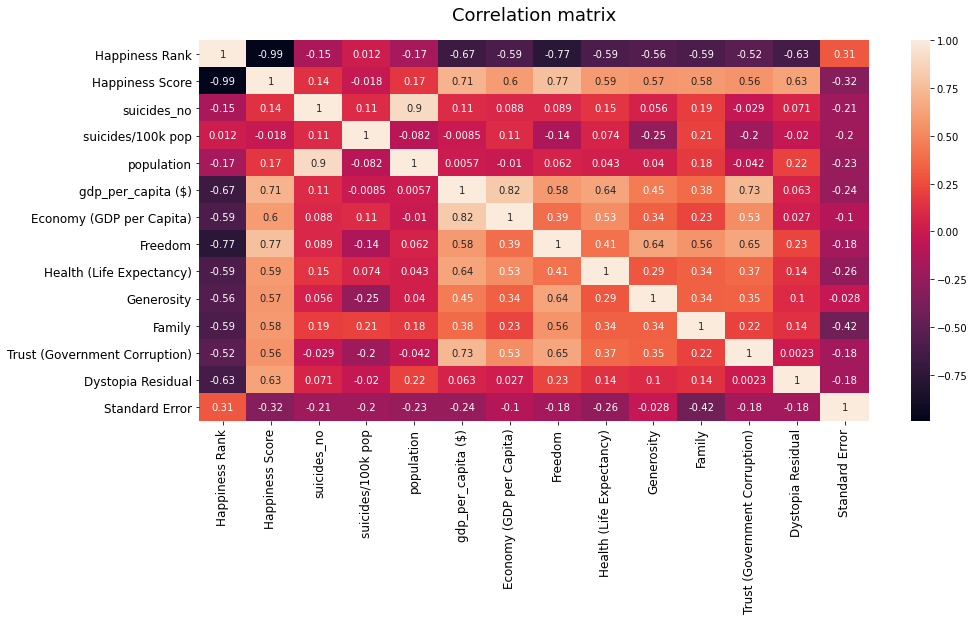

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axe = plt.subplots()
heatmap = sns.heatmap(correlation_df, annot=True)
heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=12)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=12)
axe.set_title('Correlation matrix', pad=20, fontsize=18)
fig.set_size_inches(15, 7)

In [33]:
# Drop either 'Economy (GDP per capita)' or 'gdp_per_capita($)'
merged.drop('Economy (GDP per Capita)', axis=1, inplace=True)

<h1> Model training, model selection, and embedded feature selection <br>
<h3>(With suicide dataset features)

We are going to use models that perform feature selection as they learn/ are trained (embedded models). From there we will choose one of the models with better performance in predicting.

In [34]:
from sklearn.model_selection import train_test_split

merged_x = merged.drop(['Happiness Score', 'Region'], axis=1)
merged_y = merged.pop('Happiness Score')

x_train, x_test, y_train, y_test = train_test_split(merged_x, merged_y, test_size=0.2)

x_train.shape, y_train.shape

((54, 12), (54,))

<h3> Decision Tree for regression

In [35]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

dt_preds = dt.predict(x_test)
dt_preds[ dt_preds<0] = 0

print()
print("Let's check difference between different metrics:")
print("\tTrain R2:", dt.score(x_train, y_train))
print("\tRMSLE:", 100*np.sqrt(mean_squared_log_error(y_test, dt_preds)))
print("\tTest RMSE:", np.sqrt(mean_squared_error(y_test, dt_preds)))
print("\tTest MSE:", mean_squared_error(y_test, dt_preds))

dt_preds


Let's check difference between different metrics:
	Train R2: 1.0
	RMSLE: 1.3516334107492642
	Test RMSE: 0.09314773212483454
	Test MSE: 0.008676499999999933


array([5.546, 6.611, 7.522, 5.477, 5.828, 5.332, 5.123, 6.123, 6.302,
       6.611, 5.123, 4.297, 5.123, 7.378])

<h3> XGBoost

In [36]:
from xgboost import XGBRegressor
# from sklearn.preprocessing import normalize, MinMaxScaler

xgb = XGBRegressor(n_estimators=30)
xgb.fit(x_train, y_train)

xgb_preds = xgb.predict(x_test)

print()
print("Let's check difference between different metrics:")
print("\tTrain R2:", xgb.score(x_train, y_train))
print("\tTest RMSLE:", 100*np.sqrt(mean_squared_log_error(y_test, xgb_preds)))
print("\tTest RMSE:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("\tTest MSE:", mean_squared_error(y_test, xgb_preds))

xgb_preds


Let's check difference between different metrics:
	Train R2: 0.9999895999467745
	Test RMSLE: 1.0838371638010516
	Test RMSE: 0.07323687670977914
	Test MSE: 0.005363640110203391


array([5.3700705, 6.7256694, 7.5129848, 5.4338546, 5.88501  , 5.418141 ,
       5.1581635, 5.922989 , 6.4224133, 6.745215 , 5.203829 , 4.3512163,
       5.2120237, 7.355245 ], dtype=float32)

<h3> Lasso regression

In [37]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train, y_train)
lasso_preds = lasso.predict(x_test)

print()
print("Let's check difference between different metrics:")
print("\tTrain R2:", lasso.score(x_train, y_train))
print("\tTest RMSLE:", 100*np.sqrt(mean_squared_log_error(y_test, lasso_preds)))
print("\tTest RMSE:", np.sqrt(mean_squared_error(y_test, lasso_preds)))
print("\tTest MSE:", mean_squared_error(y_test, lasso_preds))

lasso_preds


Let's check difference between different metrics:
	Train R2: 0.9839336657638034
	Test RMSLE: 1.89420097695532
	Test RMSE: 0.1410658540396455
	Test MSE: 0.01989957517593457


array([5.55409032, 6.60185377, 7.34343903, 5.57206198, 5.81684169,
       5.50117723, 5.11363501, 6.20303963, 6.63197281, 7.00585102,
       5.21903007, 4.39485556, 5.170358  , 7.21351674])

Looks that we will be safe selecting XGBoost as our preferred model? INTERPRETATION OF RMSLE?

<h1> Predictions without suicide data

In [38]:
# Drop suicide dataset
suicide_feature_list = suicide_final.columns.tolist()
suicide_feature_list.pop(-2)  # drop HDI per year since it was already rejected earlier due to too many missing values.

merged_no_suicide = merged.drop(suicide_feature_list, axis=1)

merged_no_suicide.columns

Index(['Happiness Rank', 'Freedom', 'Health (Life Expectancy)', 'Generosity',
       'Family', 'Trust (Government Corruption)', 'Dystopia Residual',
       'Standard Error', 'Region'],
      dtype='object')

In [39]:
x_train_ns, x_test_ns, y_train_ns, y_test_ns = train_test_split(merged_no_suicide.drop('Region', axis=1), merged_y)

In [40]:
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_log_error, mean_squared_error  # TODO: WHY IMPORT AGAIN?!!

xgb_nosuicide = XGBRegressor(n_estimators=30)
xgb_nosuicide.fit(x_train_ns, y_train_ns)

xgb_nosuicide_preds = xgb_nosuicide.predict(x_test_ns)

print()
print("Let's check difference between different metrics:")
print("\tTrain R2:", xgb_nosuicide.score(x_train_ns, y_train_ns))
print("\tTest RMSLE:", 100*np.sqrt(mean_squared_log_error(y_test_ns, xgb_nosuicide_preds)))
print("\tTest RMSE:", np.sqrt(mean_squared_error(y_test_ns, xgb_nosuicide_preds)))
print("\tTest MSE:", mean_squared_error(y_test_ns, xgb_nosuicide_preds))

xgb_nosuicide_preds


Let's check difference between different metrics:
	Train R2: 0.9999790824483566
	Test RMSLE: 1.2829961430639105
	Test RMSE: 0.0912063588713236
	Test MSE: 0.00831859989856467


array([5.2808614, 7.26454  , 6.6402063, 4.37629  , 6.3135843, 5.878936 ,
       4.364845 , 6.9687195, 7.3497767, 5.1501465, 7.145355 , 6.6405497,
       5.918418 , 5.137264 , 6.2900214, 6.3661304, 4.866884 ],
      dtype=float32)

In [41]:
print("\tTest RMSLE with suicide:", 100*np.sqrt(mean_squared_log_error(y_test, xgb_preds)))
print("\tTest RMSLE no suicide:", 100*np.sqrt(mean_squared_log_error(y_test_ns, xgb_nosuicide_preds)), "\n")

print("\tTrain R2 with suicide:", xgb.score(x_train, y_train))
print("\tTrain R2 no suicide:", xgb_nosuicide.score(x_train_ns, y_train_ns), "\n")

print("\tTest RMSE with suicide:", np.sqrt(mean_squared_error(y_test, xgb_preds)))
print("\tTest RMSE no suicide:", np.sqrt(mean_squared_error(y_test_ns, xgb_nosuicide_preds)), "\n")

print("\tTest MSE with suicide:", mean_squared_error(y_test, xgb_preds))
print("\tTest MSE no suicide:", mean_squared_error(y_test_ns, xgb_nosuicide_preds))

	Test RMSLE with suicide: 1.0838371638010516
	Test RMSLE no suicide: 1.2829961430639105 

	Train R2 with suicide: 0.9999895999467745
	Train R2 no suicide: 0.9999790824483566 

	Test RMSE with suicide: 0.07323687670977914
	Test RMSE no suicide: 0.0912063588713236 

	Test MSE with suicide: 0.005363640110203391
	Test MSE no suicide: 0.00831859989856467


<h1> Test for significance

Here we want to see if there is a statistically significant difference between the metrics shown above, for suicide vs no suicide predictions.